Hosts inicializados
Canais inicializados
Pares EPRs adicionados


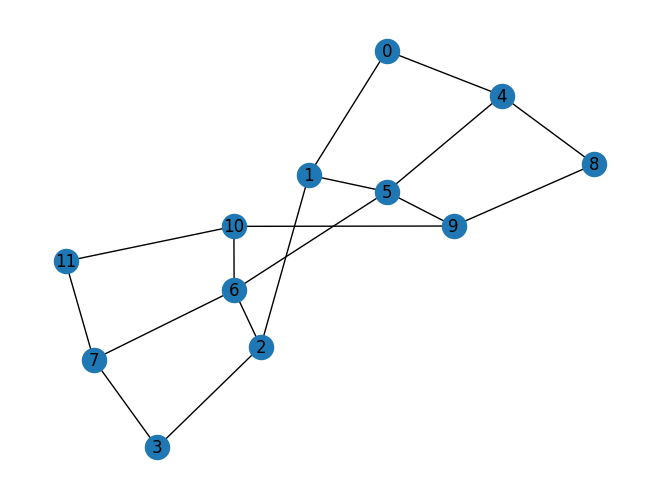

In [1]:
from quantumnet.components import Controller, Network
from quantumnet.control.table import ReactiveTable
from quantumnet.utils import generate_random_request
rede = Network()
controlador = Controller(rede)
row, col = 3, 4
rede.set_ready_topology("Grade", row, col)
rede.draw()

In [2]:
all_requests = []
for i in range(100):
    request = generate_random_request(num_hosts=10)
    all_requests.append(request)
print(all_requests)

[<quantumnet.objects.request.Request object at 0x0000014BFFCFAB70>, <quantumnet.objects.request.Request object at 0x0000014BEFEDA330>, <quantumnet.objects.request.Request object at 0x0000014BEFED8E30>, <quantumnet.objects.request.Request object at 0x0000014BEFED8A70>, <quantumnet.objects.request.Request object at 0x0000014BEFED8F80>, <quantumnet.objects.request.Request object at 0x0000014BEFED8BC0>, <quantumnet.objects.request.Request object at 0x0000014BEFED8FB0>, <quantumnet.objects.request.Request object at 0x0000014BEFED9520>, <quantumnet.objects.request.Request object at 0x0000014BFFF27470>, <quantumnet.objects.request.Request object at 0x0000014BFFF25640>, <quantumnet.objects.request.Request object at 0x0000014BFFF24C80>, <quantumnet.objects.request.Request object at 0x0000014BFFF267B0>, <quantumnet.objects.request.Request object at 0x0000014BFFF26C00>, <quantumnet.objects.request.Request object at 0x0000014BFFF26ED0>, <quantumnet.objects.request.Request object at 0x0000014BFFF24

In [3]:
# Percorrer todas as requests
#reactive = ReactiveTable()
#controlador.set_conditions_table(reactive)
for request in all_requests:
    print(f"Request analisada: {request}")
    alice = rede.get_host(request.alice)
    rule = alice.find_rule_by_request(request)
    if rule == False:
        print("Regra não encontrada")
        controlador.add_match_route_rule_in_host_reactive(request)
    else:
        print("Regra encontrada")
        print(rule)
        controlador.run_rule(rule[1])

Request analisada: R-CFAB70
Regra não encontrada
Decisão aplicada: (Normal E2E,)
Request analisada: R-EDA330
Regra não encontrada
Decisão aplicada: (Normal E2E,)
Request analisada: R-ED8E30
Regra não encontrada
Decisão aplicada: (Normal E2E,)
Request analisada: R-ED8A70
Regra não encontrada
Decisão aplicada: (Normal E2E,)
Request analisada: R-ED8F80
Regra não encontrada
Decisão aplicada: (Normal E2E,)
Request analisada: R-ED8BC0
Regra não encontrada
Decisão aplicada: (Normal E2E,)
Request analisada: R-ED8FB0
Regra não encontrada
Decisão aplicada: (Normal E2E,)
Request analisada: R-ED9520
Regra não encontrada
Decisão aplicada: (Normal E2E,)
Request analisada: R-F27470
Regra não encontrada
Decisão aplicada: (High Fidelity,)
Request analisada: R-F25640
Regra não encontrada
Decisão aplicada: (Normal E2E,)
Request analisada: R-F24C80
Regra não encontrada
Decisão aplicada: (Normal E2E,)
Request analisada: R-F267B0
Regra encontrada
([7, 3, 2, 1], BasicRule)
[BasicRule] Passo: 1
[BasicRule] Pa

In [4]:
# Percorrer todas as requests
for request in all_requests:
    print(f"Request analisada: {request}")
    alice = rede.get_host(request.alice)
    alice.draw_flow_table()
    rule = alice.find_rule_by_request(request)
    if rule == False:
        print("Regra não encontrada")
        controlador.add_match_route_rule_in_host(request)
    else:
        print("Regra encontrada")
        print(rule)
        controlador.run_rule(rule[1])

Request analisada: R-CFAB70
+--------------+--------------+-------------------+
| Match        | Route        | Rule              |
+==============+==============+===================+
| (1, 0.78, 6) | [9, 5, 1]    | BasicRule         |
+--------------+--------------+-------------------+
| (7, 0.96, 9) | [9, 5, 6, 7] | HighFidelityRoule |
+--------------+--------------+-------------------+
| (2, 0.85, 4) | [9, 5, 1, 2] | BasicRule         |
+--------------+--------------+-------------------+
| (6, 0.97, 1) | [9, 5, 6]    | HighFidelityRoule |
+--------------+--------------+-------------------+
| (1, 0.99, 6) | [9, 5, 1]    | HighFidelityRoule |
+--------------+--------------+-------------------+
| (6, 0.72, 5) | [9, 5, 6]    | BasicRule         |
+--------------+--------------+-------------------+
| (3, 0.6, 2)  | [9, 3]       | BasicRule         |
+--------------+--------------+-------------------+
| (3, 0.64, 3) | [9, 3]       | BasicRule         |
+--------------+--------------+-----